In [50]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import numpy as np

In [7]:
mnist = fetch_openml('mnist_784',as_frame = False)

In [6]:
x , y = mnist.data , mnist.target

In [11]:
x.shape

(70000, 784)

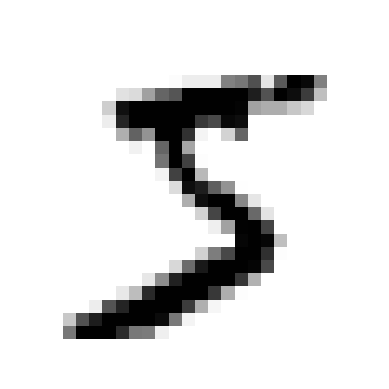

In [14]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap = 'binary')
    plt.axis("off")
some_digit = x [0]
plot_digit(some_digit)
plt.show()

In [25]:
>>> y [0]


'5'

In [26]:
y = y.astype(np.uint8)

In [28]:
x_train , x_test , y_train , y_test = x[:60000] , x[60000:],y[:60000],y[60000:]

In [29]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test==5)

In [31]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train , y_train_5)

SGDClassifier(random_state=42)

In [32]:
sgd_clf.predict([some_digit])

array([ True])

In [33]:
from sklearn.model_selection import cross_val_score 
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [34]:
from sklearn.dummy import DummyClassifier

In [36]:
dummy_clf = DummyClassifier()
dummy_clf.fit(x_train,y_train_5)
print(any(dummy_clf.predict(x_train)))

False


In [37]:
cross_val_score(dummy_clf,x_train,y_train_5,cv=3,scoring = 'accuracy')

array([0.90965, 0.90965, 0.90965])

In [38]:
from sklearn.model_selection import cross_val_predict

In [39]:
y_train_pred = cross_val_predict(sgd_clf ,x_train , y_train_5 , cv=3)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cm = confusion_matrix(y_train_5,y_train_pred)

In [42]:
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [63]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)

0.8370879772350012

In [42]:
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [45]:
y_train_perfect_predictions = y_train_5
cm = confusion_matrix(y_train_5,y_train_perfect_predictions)

In [46]:
cm

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [65]:
precision_score(y_train_5, y_train_pred) 

0.8370879772350012

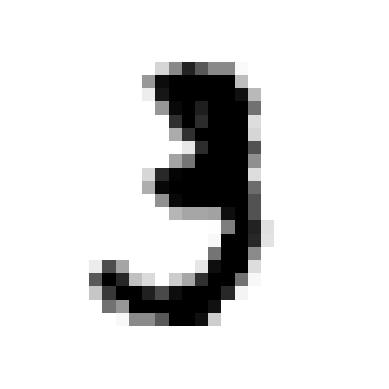

In [54]:
some_digit = x[10]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()


In [55]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-5711.47789687])

In [56]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [57]:
threshold = -6000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [59]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,
            method="decision_function")

In [67]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [61]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])    

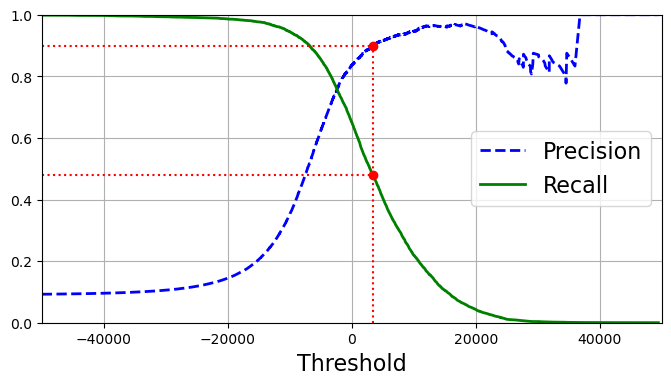

In [68]:
plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

In [69]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

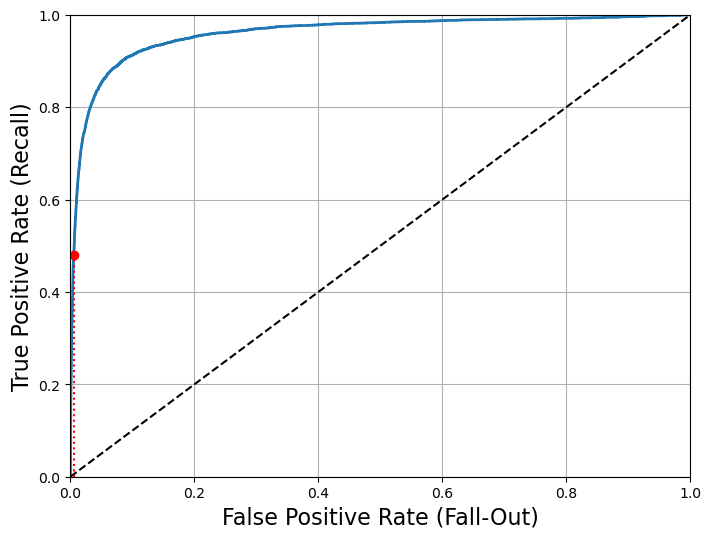

In [70]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [75]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3,
                    method="predict_proba")

In [76]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

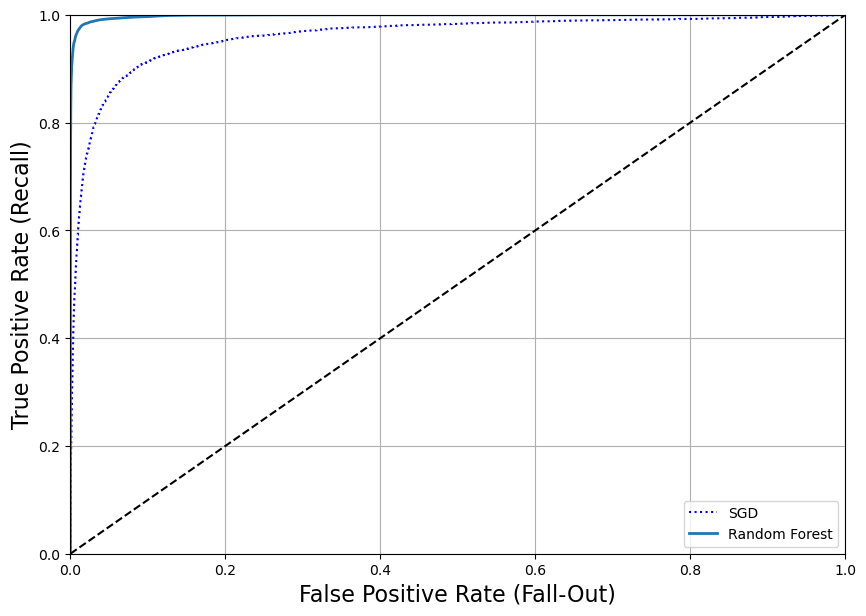

In [77]:
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()